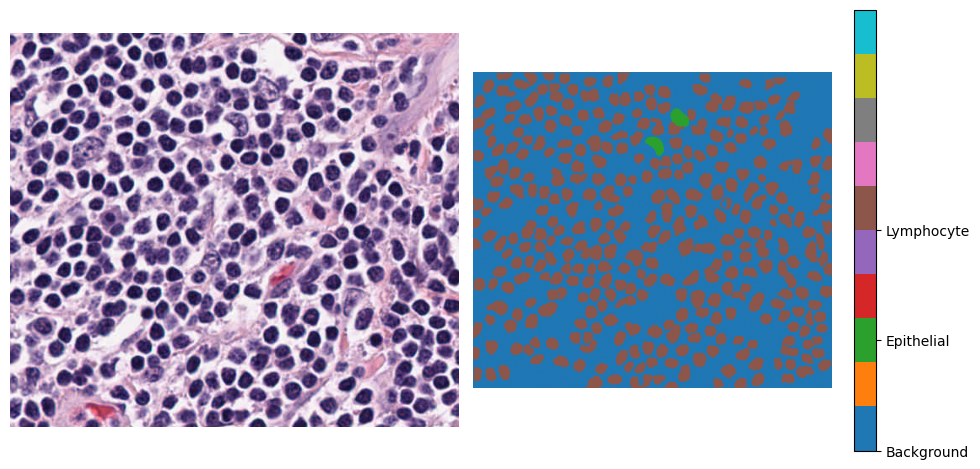

In [24]:
from src.dataset import MoNuSACDataset
from src.constants import NAME_CLASS_MAPPING
import torchvision.transforms.functional as TF
import numpy as np
import matplotlib.pyplot as plt


class_idx_name_mapping = {i: c for (i, c) in enumerate(NAME_CLASS_MAPPING)}

dataset = MoNuSACDataset(root="./data/train/masks")
img, mask = dataset.__getitem__(57)

mask_array = np.array(mask)

_, axes = plt.subplots(1, 2, figsize=(10, 15))

axes[0].imshow(img, cmap="grey")
axes[0].axis("off")

im = axes[1].imshow(mask, cmap="tab10", vmin=0, vmax=4)
axes[1].axis("off")

cbar = plt.colorbar(im, ax=axes[1], shrink=0.3, aspect=20)
class_names = ['Background'] + list(NAME_CLASS_MAPPING)[:-1]
unique_vals = np.unique(mask_array)

cbar.set_ticks(unique_vals.tolist()) 
cbar.set_ticklabels([class_names[i] for i in unique_vals])

plt.tight_layout()
plt.show()

In [34]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

mask_tensor = torch.tensor(mask_array).long()
targets = F.one_hot(mask_tensor, num_classes=5)
targets = targets.permute(2, 0, 1)
